# Initial data exploration

Take a wee look at some train delay data.

Data obtained from [Network Rail](https://www.networkrail.co.uk/who-we-are/transparency-and-ethics/transparency/open-data-feeds/). It should be downloaded and unzipped into the `data/raw/` folder.
 

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
current_directory = os.getcwd()
print(current_directory)

/mnt/c/Users/yshang/OneDrive - Tessella Ltd/Documents/Training/GNN/train-delays/notebooks


## Load  data


In [7]:
data = pd.read_csv("../data/raw/raw_delays_01.csv")
metadata = pd.read_excel("../data/raw/metadata.xlsx", sheet_name=None)

/tmp/ipykernel_831/2438527655.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/raw/raw_delays_01.csv")


In [8]:
data.columns

Index(['FINANCIAL_YEAR_PERIOD', 'ORIGIN_DEPARTURE_DATE', 'TRUST_TRAIN_ID',
       'PLANNED_ORIGIN_LOCATION_CODE', 'PLANNED_ORIGIN_WTT_DATETIME',
       'PLANNED_ORIGIN_GBTT_DATETIME', 'PLANNED_DEST_LOCATION_CODE',
       'PLANNED_DEST_WTT_DATETIME', 'PLANNED_DEST_GBTT_DATETIME',
       'TRAIN_SERVICE_CODE', 'SERVICE_GROUP_CODE', 'TOC_CODE',
       'ENGLISH_DAY_TYPE', 'APPLICABLE_TIMETABLE_FLAG', 'TRAIN_SCHEDULE_TYPE',
       'TRACTION_TYPE', 'TRAILING_LOAD', 'TIMING_LOAD', 'UNIT_CLASS',
       'INCIDENT_NUMBER', 'INCIDENT_CREATE_DATE', 'INCIDENT_START_DATETIME',
       'INCIDENT_END_DATETIME', 'SECTION_CODE', 'NR_LOCATION_MANAGER',
       'RESPONSIBLE_MANAGER', 'INCIDENT_REASON', 'ATTRIBUTION_STATUS',
       'INCIDENT_EQUIPMENT', 'INCIDENT_DESCRIPTION', 'REACT_REASON',
       'INCIDENT_RESP_TRAIN', 'RESP_TRAIN', 'REACT_TRAIN', 'EVENT_TYPE',
       'START_STANOX', 'END_STANOX', 'EVENT_DATETIME', 'PFPI_MINUTES',
       'NON_PFPI_MINUTES'],
      dtype='object')

Reading from the [documentation](docs/Explanation-of-historic-attributed-delays.pdf), some of these columns can immediately be discarded.

In [9]:
columns_to_drop = ['FINANCIAL_YEAR_PERIOD','ORIGIN_DEPARTURE_DATE', 'APPLICABLE_TIMETABLE_FLAG', 
                   'TRAIN_SCHEDULE_TYPE', 'TRACTION_TYPE', 'TRAILING_LOAD', 'TIMING_LOAD', 'UNIT_CLASS', 'INCIDENT_NUMBER',
                   'RESPONSIBLE_MANAGER', 'ATTRIBUTION_STATUS', 'INCIDENT_EQUIPMENT']
data.drop(columns=columns_to_drop, inplace=True)

In [10]:
# print the remaining columns
data.columns

Index(['TRUST_TRAIN_ID', 'PLANNED_ORIGIN_LOCATION_CODE',
       'PLANNED_ORIGIN_WTT_DATETIME', 'PLANNED_ORIGIN_GBTT_DATETIME',
       'PLANNED_DEST_LOCATION_CODE', 'PLANNED_DEST_WTT_DATETIME',
       'PLANNED_DEST_GBTT_DATETIME', 'TRAIN_SERVICE_CODE',
       'SERVICE_GROUP_CODE', 'TOC_CODE', 'ENGLISH_DAY_TYPE',
       'INCIDENT_CREATE_DATE', 'INCIDENT_START_DATETIME',
       'INCIDENT_END_DATETIME', 'SECTION_CODE', 'NR_LOCATION_MANAGER',
       'INCIDENT_REASON', 'INCIDENT_DESCRIPTION', 'REACT_REASON',
       'INCIDENT_RESP_TRAIN', 'RESP_TRAIN', 'REACT_TRAIN', 'EVENT_TYPE',
       'START_STANOX', 'END_STANOX', 'EVENT_DATETIME', 'PFPI_MINUTES',
       'NON_PFPI_MINUTES'],
      dtype='object')

The Train service codes denote different kinds of trains including freight and cargo, we need to filter for just passenger trains.

The documentation provides the train company code with their corresponding operating company. There were more than 100 companies in total, and I wasn't going to look all of them up so I passed the list to ChatGPT to return me the passenger trains. 

In [11]:
passenger_train_companies = [
    "E1",  # GWR Charters
    "EA",  # TPE
    "EB",  # Greater Anglia
    "EC",  # Grand Central
    "ED",  # Northern Trains
    "EF",  # GWR
    "EH",  # CrossCountry
    "EI",  # Wrexham & Shrops
    "EJ",  # West Midlands Trains
    "EK",  # London Overground
    "EM",  # EMR
    "ES",  # Caledonian Sleeper
    "ET",  # GTR
    "EX",  # TfL Rail
    "HA",  # ScotRail
    "HB",  # LNER
    "HG",  # Central
    "HH",  # VXC
    "HI",  # MML
    "HJ",  # GWR HSTs
    "HL",  # Transport for Wales 
    "HT",  # c2c
    "HU",  # Southeastern
    "HX",  # Thameslink
    "HY"   # South Western Railway
]
passenger_train_data = data[data['TOC_CODE'].isin(passenger_train_companies)]

In [12]:
print('length of dataset: ' + str(len(data)))
print('length of filtered dataset: ' + str(len(passenger_train_data)))


length of dataset: 332824
length of filtered dataset: 256458


Lets check the most significant companies in the whole dataset and check that we haven't missed any important ones.

<Axes: xlabel='TOC_CODE'>

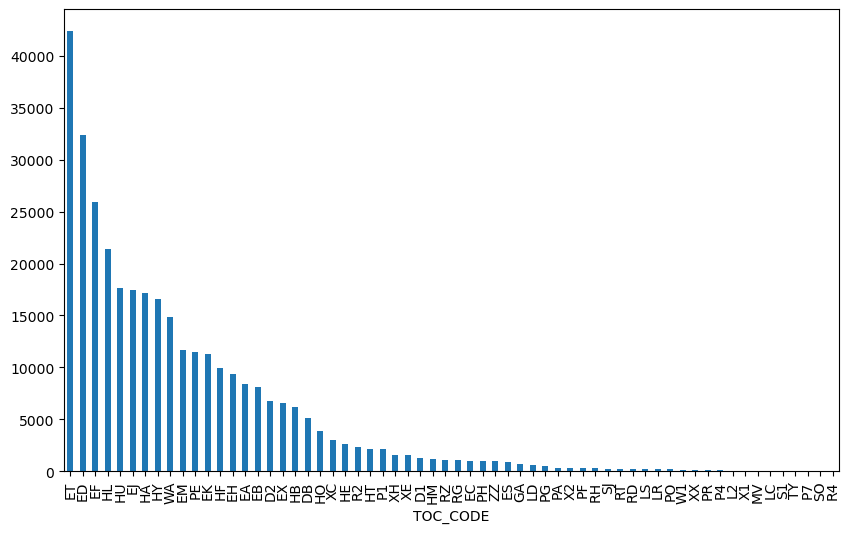

In [13]:
toc = data['TOC_CODE'].value_counts()
plt.figure(figsize=(10, 6))
toc.plot.bar()

<Axes: xlabel='TOC_CODE'>

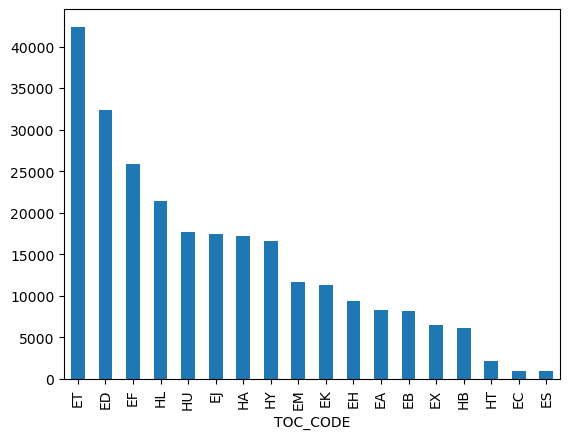

In [14]:
passenger_train_data['TOC_CODE'].value_counts().plot.bar()

## Other features

The other features need a bit of investigating.

In [15]:
columns_to_keep = []
print(passenger_train_data.columns)

Index(['TRUST_TRAIN_ID', 'PLANNED_ORIGIN_LOCATION_CODE',
       'PLANNED_ORIGIN_WTT_DATETIME', 'PLANNED_ORIGIN_GBTT_DATETIME',
       'PLANNED_DEST_LOCATION_CODE', 'PLANNED_DEST_WTT_DATETIME',
       'PLANNED_DEST_GBTT_DATETIME', 'TRAIN_SERVICE_CODE',
       'SERVICE_GROUP_CODE', 'TOC_CODE', 'ENGLISH_DAY_TYPE',
       'INCIDENT_CREATE_DATE', 'INCIDENT_START_DATETIME',
       'INCIDENT_END_DATETIME', 'SECTION_CODE', 'NR_LOCATION_MANAGER',
       'INCIDENT_REASON', 'INCIDENT_DESCRIPTION', 'REACT_REASON',
       'INCIDENT_RESP_TRAIN', 'RESP_TRAIN', 'REACT_TRAIN', 'EVENT_TYPE',
       'START_STANOX', 'END_STANOX', 'EVENT_DATETIME', 'PFPI_MINUTES',
       'NON_PFPI_MINUTES'],
      dtype='object')


We'll start with the columns relating to datetimes:

In [16]:
datetime_columns = ['PLANNED_ORIGIN_WTT_DATETIME', 'PLANNED_ORIGIN_GBTT_DATETIME','INCIDENT_CREATE_DATE', 
                    'INCIDENT_START_DATETIME', 'INCIDENT_END_DATETIME', 'EVENT_DATETIME', 'ENGLISH_DAY_TYPE',
                    'PLANNED_DEST_WTT_DATETIME', 'PLANNED_DEST_GBTT_DATETIME', 'PFPI_MINUTES', 'NON_PFPI_MINUTES']
passenger_train_data[datetime_columns].sample(n=10)

,PLANNED_ORIGIN_WTT_DATETIME,PLANNED_ORIGIN_GBTT_DATETIME,INCIDENT_CREATE_DATE,INCIDENT_START_DATETIME,INCIDENT_END_DATETIME,EVENT_DATETIME,ENGLISH_DAY_TYPE,PLANNED_DEST_WTT_DATETIME,PLANNED_DEST_GBTT_DATETIME,PFPI_MINUTES,NON_PFPI_MINUTES
152750,14-APR-2022 12:25,14-APR-2022 12:25,14-APR-2022 00:00,14-APR-2022 11:20,14-APR-2022 19:29,14-APR-2022 12:56,WD,14-APR-2022 14:11,14-APR-2022 14:11,4.0,0.0
21866,02-APR-2022 19:19,02-APR-2022 19:19,02-APR-2022 00:00,02-APR-2022 18:50,03-APR-2022 03:04,02-APR-2022 19:30,SA,02-APR-2022 20:38,02-APR-2022 20:38,0.0,0.0
87054,08-APR-2022 06:03,08-APR-2022 06:03,08-APR-2022 00:00,08-APR-2022 09:13,08-APR-2022 17:18,08-APR-2022 11:46,WD,08-APR-2022 11:06,08-APR-2022 11:06,7.0,0.0
134144,12-APR-2022 06:54,12-APR-2022 06:54,12-APR-2022 00:00,12-APR-2022 06:38,12-APR-2022 14:41,12-APR-2022 07:17,WD,12-APR-2022 07:44,12-APR-2022 07:44,2.0,0.0
128496,12-APR-2022 06:17,12-APR-2022 06:17,12-APR-2022 00:00,12-APR-2022 05:36,12-APR-2022 13:45,12-APR-2022 07:23,WD,12-APR-2022 07:30,12-APR-2022 07:30,5.0,0.0
321926,29-APR-2022 18:02,29-APR-2022 18:02,29-APR-2022 00:00,29-APR-2022 16:34,30-APR-2022 00:35,29-APR-2022 18:22,WD,29-APR-2022 19:05,29-APR-2022 19:05,5.0,0.0
131819,12-APR-2022 17:56,12-APR-2022 17:56,08-APR-2022 00:00,08-APR-2022 04:16,08-APR-2022 14:12,12-APR-2022 19:38,WD,12-APR-2022 19:44,12-APR-2022 19:44,2.0,0.0
298686,28-APR-2022 19:48,28-APR-2022 19:48,28-APR-2022 00:00,28-APR-2022 19:22,29-APR-2022 03:56,28-APR-2022 20:48,WD,28-APR-2022 20:43,28-APR-2022 20:43,9.0,0.0
138012,13-APR-2022 11:48,13-APR-2022 11:48,13-APR-2022 00:00,13-APR-2022 09:46,13-APR-2022 18:01,13-APR-2022 16:02,WD,13-APR-2022 15:48,13-APR-2022 15:49,53.0,0.0
135388,13-APR-2022 17:54,13-APR-2022 17:54,13-APR-2022 00:00,13-APR-2022 18:00,14-APR-2022 02:12,13-APR-2022 18:00,WD,13-APR-2022 20:36,13-APR-2022 20:36,6.0,0.0


OK, so a few things to note then:

- the WTT ("Working Time Table") and the GBTT ("Great British Time Table") are almost always the same, except sometimes the GBTT is a `NaN`. The GBTT is what the public sees, and the WTT is what the railway staff see. I don't _really_ undestand why they're using two different time tables that are basically the same, but with the amount of NaNs in the GBTT I think its safe to delete these columns.
- I can't find what the difference between "PFPI" minutes and "non-PFPI" minutes. PFPI seems to stand for "Planning for Performance Improvement", and the document states PFPI is the metric to use so lets go with that. 
- The event seems to always occur after the incident, it's likely that the incident causes the delay and the event is the delay event itself. The create_date looks like its just the date that it goes into the system, as it's always 00:00


In [17]:
columns_to_keep.extend(['PLANNED_ORIGIN_WTT_DATETIME', 'INCIDENT_START_DATETIME', 'INCIDENT_END_DATETIME', 'EVENT_DATETIME', 'PFPI_MINUTES'])

## Location based columns


In [18]:
passenger_train_data.columns[~passenger_train_data.columns.isin(datetime_columns)]

Index(['TRUST_TRAIN_ID', 'PLANNED_ORIGIN_LOCATION_CODE',
       'PLANNED_DEST_LOCATION_CODE', 'TRAIN_SERVICE_CODE',
       'SERVICE_GROUP_CODE', 'TOC_CODE', 'SECTION_CODE', 'NR_LOCATION_MANAGER',
       'INCIDENT_REASON', 'INCIDENT_DESCRIPTION', 'REACT_REASON',
       'INCIDENT_RESP_TRAIN', 'RESP_TRAIN', 'REACT_TRAIN', 'EVENT_TYPE',
       'START_STANOX', 'END_STANOX'],
      dtype='object')

In [19]:
location_columns = ['PLANNED_ORIGIN_LOCATION_CODE', 'PLANNED_DEST_LOCATION_CODE', 'TRAIN_SERVICE_CODE',
       'SERVICE_GROUP_CODE', 'SECTION_CODE', 'NR_LOCATION_MANAGER', 'START_STANOX', 'END_STANOX']
passenger_train_data[location_columns].sample(n=10)

,PLANNED_ORIGIN_LOCATION_CODE,PLANNED_DEST_LOCATION_CODE,TRAIN_SERVICE_CODE,SERVICE_GROUP_CODE,SECTION_CODE,NR_LOCATION_MANAGER,START_STANOX,END_STANOX
59069,52741,50328,25381001,EX01,50434:52226,OQHN,50401,50334
210484,32000,32555,12226820,ED10,32050:32552,OQFQ,32050,32552
160621,4303,54311,21700001,HB01,32000,OQFQ,44421,44999
34633,56221,55247,12325021,EM01,55120:55111,OQVN,56221,56245
5474,52051,87651,22218000,EK99,52084:87568,OQYA,52074,52074
244737,87219,52226,22204000,EK01,72238:72237,OQB1,87132,87132
310032,88401,88466,24650005,HU02,88711:88466,OQM6,88464,88466
188648,54311,18641,21756006,EC02,16416,OQIE,18414,18441
13918,9161,17132,21151900,ED04,09180:09419,OQFO,9180,9419
114745,52741,50422,21945001,EB99,52741,OQHN,52701,52226


- All location codes are STANOX. 
- START_STANOX is the location of the event, don't know why its different from END_STANOX sometimes.
- We want the origin and destination of the journey, and the start_stanox. Don't care about the rest.
- Lets rename these to something more standardised/descriptive


In [20]:
columns_to_keep.extend(['PLANNED_ORIGIN_LOCATION_CODE', 'PLANNED_DEST_LOCATION_CODE', 'START_STANOX'])
rename = {'PLANNED_ORIGIN_LOCATION_CODE': 'ORIGIN_STANOX', 
          'PLANNED_DEST_LOCATION_CODE': 'DESTINATION_STANOX', 
          'START_STANOX': 'EVENT_STANOX'}

In [21]:
examined_columns = []
examined_columns.extend(location_columns)
examined_columns.extend(datetime_columns)

In [22]:
remaining_columns = passenger_train_data.columns[~passenger_train_data.columns.isin(examined_columns)]
print(remaining_columns)

Index(['TRUST_TRAIN_ID', 'TOC_CODE', 'INCIDENT_REASON', 'INCIDENT_DESCRIPTION',
       'REACT_REASON', 'INCIDENT_RESP_TRAIN', 'RESP_TRAIN', 'REACT_TRAIN',
       'EVENT_TYPE'],
      dtype='object')


In [23]:
passenger_train_data[remaining_columns].sample(n=10)

,TRUST_TRAIN_ID,TOC_CODE,INCIDENT_REASON,INCIDENT_DESCRIPTION,REACT_REASON,INCIDENT_RESP_TRAIN,RESP_TRAIN,REACT_TRAIN,EVENT_TYPE
203085,742E77M519,EF,JX,MIM EVE ENG WORKS,NaN,NaN,NaN,NaN,M
276318,172S52MY26,ED,MT,2S52 UNIT FLT BDQ,NaN,2S52,172S52MY26,NaN,M
268774,651V29M725,EJ,TG,1V29 CAPED WOS,TG,651V29M725,651V29M725,NaN,P
299424,152W19ME28,ED,XR,BLO VANDALS FLR,NaN,NaN,NaN,NaN,M
122050,879T68M811,ET,OC,9T68 3 OVERTIME GTW,NaN,9T68,879T68M811,NaN,M
263773,129M36MV25,EA,M8,1D44 BRAKE FLT MIA,YD,321D44MY25,321D44MY25,321D44MY25,M
86021,529G64M708,EK,IB,CFTNRJN VS984 PTS FLR,IB,NaN,NaN,NaN,P
103622,182F08MT10,ED,MY,1V64 SET FAULT EDB,YB,1V64,041V64MM10,851S49MF10,M
225933,522N23MZ21,EK,I1,XMB THIRD RAIL LINESIDE FIRE,YI,2Y96,522Y96MQ21,872N64NY21,M
261499,861C21MF24,ET,TZ,1T02 SCHEDULE RDH L2,YI,1T02,871T022224,871B80MB24,O


- There might be some interesting information in the list of trains involved in the incident `'TRUST_TRAIN_ID', 'INCIDENT_RESP_TRAIN', 'RESP_TRAIN', 'REACT_TRAIN'`, however it's not clear what these are or the difference or relationship between them.
- The incident reason is more intelligible than the description when paired with the lookup metadata.

In [24]:
columns_to_keep.extend(['TOC_CODE', 'INCIDENT_REASON', 'EVENT_TYPE'])

In [25]:
selected_data = passenger_train_data[columns_to_keep]

In [26]:
rename.update({'PLANNED_ORIGIN_WTT_DATETIME': 'JOURNEY_ORIGIN_DATETIME',
               'TOC_CODE' : 'TOC',
               'PFPI_MINUTES': 'DELAY_MINUTES'})

In [29]:
selected_data.rename(rename, axis=1, inplace=True)
selected_data.reset_index(inplace=True)

/tmp/ipykernel_831/1593976746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.rename(rename, axis=1, inplace=True)


In [30]:
selected_data

,index,JOURNEY_ORIGIN_DATETIME,INCIDENT_START_DATETIME,INCIDENT_END_DATETIME,EVENT_DATETIME,DELAY_MINUTES,ORIGIN_STANOX,DESTINATION_STANOX,EVENT_STANOX,TOC,INCIDENT_REASON,EVENT_TYPE
0,22,01-APR-2022 06:01,01-APR-2022 07:00,01-APR-2022 16:43,01-APR-2022 07:31,2.0,1100,2071,2015,HA,RB,M
1,23,01-APR-2022 06:01,01-APR-2022 00:01,01-APR-2022 23:59,01-APR-2022 07:31,1.0,1100,2071,2015,HA,ZU,M
2,24,01-APR-2022 07:10,01-APR-2022 09:13,01-APR-2022 17:18,01-APR-2022 09:13,3.0,1100,2071,2029,HA,IW,M
3,25,01-APR-2022 11:02,01-APR-2022 12:36,01-APR-2022 21:21,01-APR-2022 12:36,3.0,1100,2071,2015,HA,ZU,M
4,26,01-APR-2022 11:02,01-APR-2022 12:36,01-APR-2022 21:21,01-APR-2022 13:16,3.0,1100,2071,2042,HA,ZU,M
...,...,...,...,...,...,...,...,...,...,...,...,...
256453,332819,30-APR-2022 15:52,30-APR-2022 14:00,30-APR-2022 22:32,30-APR-2022 16:00,3.0,89351,87245,89351,ET,OC,M
256454,332820,30-APR-2022 16:22,30-APR-2022 16:00,01-MAY-2022 01:45,30-APR-2022 17:21,8.0,89351,87245,88413,ET,VH,M
256455,332821,30-APR-2022 19:52,30-APR-2022 19:08,01-MAY-2022 03:33,30-APR-2022 20:01,4.0,89351,87245,89351,ET,QM,M
256456,332822,30-APR-2022 20:52,30-APR-2022 20:12,01-MAY-2022 04:14,30-APR-2022 21:02,5.0,89351,87245,89351,ET,TH,M
